### The first analysis we are to carry out is the Chicago Crimes 2001 to 2004

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [41]:
# Chicago_Crimes_1_4 = pd.read_csv("Chicago_Crimes_2001_to_2004.csv")
try:
    df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

df.head(-50)

C:\Users\User\AppData\Local\Temp\ipykernel_9276\4158652799.py:3: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', on_bad_lines='skip')


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923460,6218349,10799567,HZ569841,06/16/2002 07:00:00 PM,038XX W BELDEN AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,...,35.0,22.0,02,NaN,NaN,2002.0,12/31/2016 03:47:04 PM,NaN,NaN,NaN
1923461,6228059,10813751,JA113073,03/17/2003 08:00:00 PM,029XX N MELVINA AVE,5093,NON-CRIMINAL,LOST PASSPORT,RESIDENCE,False,...,29.0,19.0,26,NaN,NaN,2003.0,01/14/2017 03:49:38 PM,NaN,NaN,NaN
1923462,6236249,4755307,HM367521,01/23/2002 12:00:00 AM,077XX S GREENWOOD AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,...,8.0,69.0,06,NaN,NaN,2002.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1923463,6236480,4647968,HM246598,02/01/2002 12:00:00 AM,029XX W LYNDALE ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,1156401.0,1914947.0,2002.0,04/15/2016 08:55:02 AM,41.922399,-87.700759,"(41.92239897, -87.700758614)"


### Checking if some rows that have unique numbers are duplicated and removing them

In [42]:
df = df.drop_duplicates(subset=['ID', 'Case Number'], keep="first")


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1834256 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool(2), 

In [44]:
df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description        16
Arrest                       0
Domestic                     0
Beat                         0
District                     2
Ward                    614802
Community Area          614911
FBI Code                     0
X Coordinate             24016
Y Coordinate             24016
Year                         0
Updated On                   0
Latitude                 24016
Longitude                24016
Location                 24016
dtype: int64

In [45]:
df.Description.value_counts()

Description
SIMPLE                           279592
$500 AND UNDER                   177076
TO VEHICLE                       104835
TO PROPERTY                       99982
OVER $500                         97521
                                  ...  
FAILURE TO KEEP HYPO RECORDS          1
AGGRAVATED COMPUTER TAMPERING         1
INVOLUNTARY MANSLAUGHTER              1
PATRONIZE JUVENILE PROSTITUTE         1
LOST PASSPORT                         1
Name: count, Length: 339, dtype: int64

In [46]:
df.Beat.value_counts()

Beat
423     13757
421     13062
1112    12539
823     11767
414     11056
        ...  
114         1
1915        1
1235        1
1654        1
1921        1
Name: count, Length: 298, dtype: int64

Text(0.5, 0, 'Ward  %')

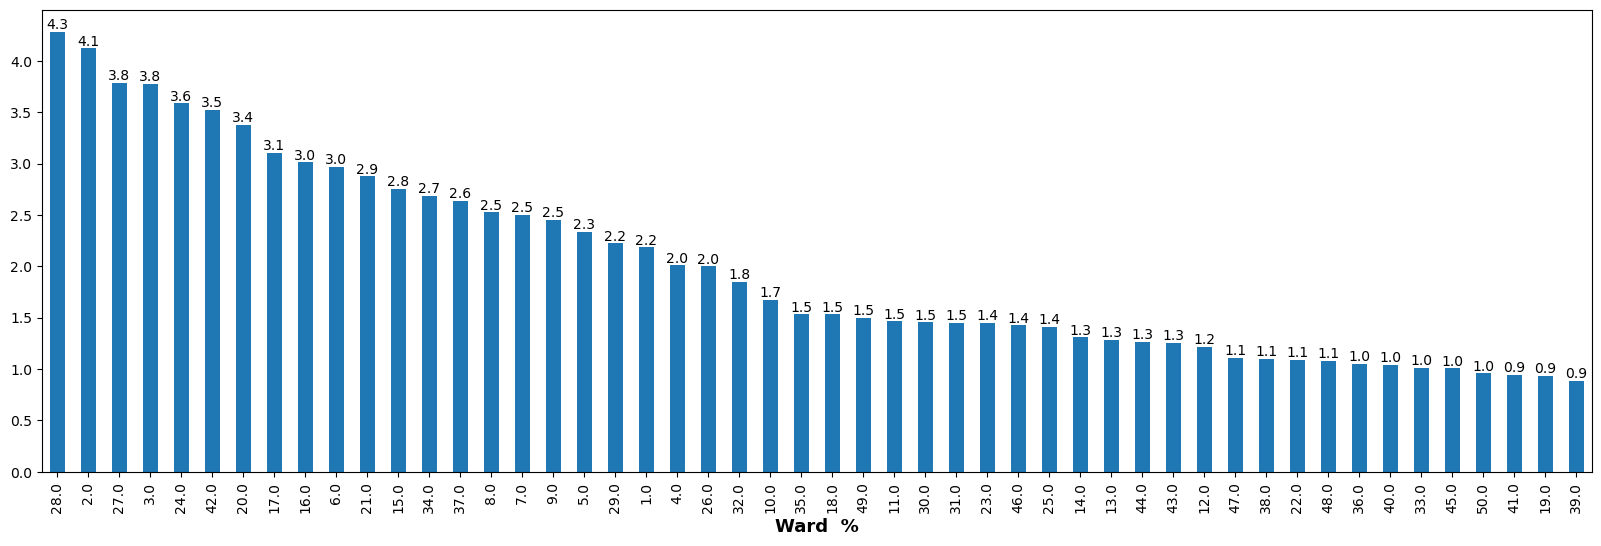

In [47]:
ward = df.Ward.value_counts(normalize = True)*100
bars = ward.plot(kind = "bar", figsize = (20, 6))
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.xlabel("Ward  %", fontsize = 13, fontweight = "bold")

### important notes for data cleaning 

1. remove the following columns [`longitude`, `latitude`, `location`, `x-cordinate`, `y-cordinate`, etc] because the ward shows the exact location of where they took place. the X and Y coordinate of a row can be converted to it relative longitude and latitude which in turn can changed to chicago ward location


In [48]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [49]:
print (df.Location[1]) 
print (df["X Coordinate"][1], df["Y Coordinate"][1])

(41.817229156, -87.637328162)
1173974.0 1876757.0


In [50]:
df.shape

(1834256, 23)

In [51]:
df.Ward.isnull().sum()

614802

In [52]:
df.Ward.head()

0     7.0
1    11.0
2    35.0
3    31.0
4    34.0
Name: Ward, dtype: float64

In [53]:
df.District.value_counts().sort_index()

District
1.0      61596
2.0     111208
3.0      91271
4.0      98454
5.0      77730
6.0      97591
7.0     106287
8.0     121081
9.0      93034
10.0     74836
11.0    111835
12.0     94590
14.0     81203
15.0     78228
16.0     59894
17.0     53754
18.0     81805
19.0     84710
20.0     34460
21.0         4
22.0     58288
24.0     56050
25.0    106336
31.0         9
Name: count, dtype: int64

In [54]:
df.Block.value_counts().sort_index()

Block
0000X E 100 PL         44
0000X E 100 ST         44
0000X E 100TH PL       78
0000X E 100TH ST       73
0000X E 101 PL         10
                       ..
137XX S INDIANA AVE    14
137XX S JEFFERY AV      1
137XX S JEFFERY AVE     2
137XX S LEYDEN AV      25
137XX S LEYDEN AVE     33
Name: count, Length: 55588, dtype: int64

In [55]:
df_filtered = df[pd.isna(df['Ward'])]
df_filtered

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1332,808956,1954658,HH143979,01/23/2002 05:30:00 PM,071XX S EAST END AV,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,...,NaN,NaN,02,1188770.0,1857951.0,2002.0,08/06/2016 03:49:51 PM,41.765282,-87.583655,"(41.765282432, -87.583654702)"
1450,814436,636,G008548,01/04/2001 10:30:00 PM,035XX W 12 PL,0110,HOMICIDE,FIRST DEGREE MURDER,BASEMENT,True,...,NaN,NaN,01A,1153021.0,1894062.0,2001.0,08/17/2015 03:03:40 PM,41.865156,-87.713732,"(41.865156224, -87.71373199)"
1457,814500,637,G005960,01/06/2001 10:35:00 AM,014XX N HARDING ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,NaN,NaN,01A,1149782.0,1909379.0,2001.0,08/17/2015 03:03:40 PM,41.907251,-87.725224,"(41.907251262, -87.725224066)"
1468,814582,638,G008793,01/05/2001 04:22:00 PM,016XX W 80 ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,NaN,NaN,01A,1166645.0,1851658.0,2001.0,08/17/2015 03:03:40 PM,41.748514,-87.664929,"(41.748514115, -87.664928601)"
1507,815017,642,G013102,01/07/2001 12:48:00 AM,007XX E 79 ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,NaN,NaN,01A,1182418.0,1852784.0,2001.0,08/17/2015 03:03:40 PM,41.751253,-87.607096,"(41.751253211, -87.607096334)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923437,6196331,1833095,G668623,11/06/2001 11:20:00 AM,052XX W MADISON ST,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,...,NaN,NaN,03,1141706.0,1899567.0,2001.0,08/17/2015 03:03:40 PM,41.880479,-87.755134,"(41.880479241, -87.755133992)"
1923438,6196332,1839832,G676174,11/09/2001 02:30:00 PM,037XX W 85 PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,...,NaN,NaN,05,1153023.0,1847579.0,2001.0,08/17/2015 03:03:40 PM,41.7376,-87.714952,"(41.737600181, -87.714952278)"
1923439,6196333,1899039,G752382,12/16/2001 07:20:00 PM,052XX W MADISON ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,NaN,NaN,08B,1141706.0,1899567.0,2001.0,08/17/2015 03:03:40 PM,41.880479,-87.755134,"(41.880479241, -87.755133992)"
1923440,6196334,1908900,G767033,12/23/2001 09:30:00 PM,052XX W MADISON ST,0820,THEFT,$500 AND UNDER,STREET,False,...,NaN,NaN,06,1141706.0,1899567.0,2001.0,08/17/2015 03:03:40 PM,41.880479,-87.755134,"(41.880479241, -87.755133992)"


In [56]:
wa = df.dropna(subset = ["Ward"])
wa.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


#### 1. We have over 1 million rows in the data set. and from random sampling, we can use a certain percentage of the total number of row
#### 2. there are columns that the ward number is missing and ward is one of the key column in the dataset.

### So the fist set of analysis, we will remove the rows that the wards are `nan`

In [57]:
# getting a copy of the dataset
df1 = df
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [58]:
df1 = df1.dropna(subset = ["Ward"])
df1.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219454 entries, 0 to 1923514
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1219454 non-null  int64  
 1   ID                    1219454 non-null  int64  
 2   Case Number           1219454 non-null  object 
 3   Date                  1219454 non-null  object 
 4   Block                 1219454 non-null  object 
 5   IUCR                  1219454 non-null  object 
 6   Primary Type          1219454 non-null  object 
 7   Description           1219454 non-null  object 
 8   Location Description  1219441 non-null  object 
 9   Arrest                1219454 non-null  bool   
 10  Domestic              1219454 non-null  bool   
 11  Beat                  1219454 non-null  int64  
 12  District              1219452 non-null  float64
 13  Ward                  1219454 non-null  float64
 14  Community Area        1219342 non-null 

In [60]:
# visualize the last updated time 
df1["Case Number"].value_counts()

Case Number
HJ590004    6
HJ104730    4
HJ756295    4
HK827036    3
G491428     3
           ..
HJ159811    1
HJ187461    1
HJ159714    1
HJ187647    1
HM274913    1
Name: count, Length: 1219379, dtype: int64

#### Removing columns that are not needed in the analysis. they include;
1. X coordinate
2. Y coordinate
3. updated on
4. latitude
5. longitude
6. location
7. Unnamed
8. ID
9. Case Number

##### Note: the columns are used to get the wards of the dataset

In [61]:
df1 = df1.drop(columns  = ["X Coordinate", "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "ID", "Case Number", "Unnamed: 0"])
df1.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,424,4.0,7.0,46.0,06,2004.0
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,935,9.0,11.0,61.0,26,2003.0
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,1413,14.0,35.0,22.0,20,2004.0
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2521,25.0,31.0,20.0,06,2004.0
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2233,22.0,34.0,49.0,06,2003.0


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219454 entries, 0 to 1923514
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1219454 non-null  object 
 1   Block                 1219454 non-null  object 
 2   IUCR                  1219454 non-null  object 
 3   Primary Type          1219454 non-null  object 
 4   Description           1219454 non-null  object 
 5   Location Description  1219441 non-null  object 
 6   Arrest                1219454 non-null  bool   
 7   Domestic              1219454 non-null  bool   
 8   Beat                  1219454 non-null  int64  
 9   District              1219452 non-null  float64
 10  Ward                  1219454 non-null  float64
 11  Community Area        1219342 non-null  float64
 12  FBI Code              1219454 non-null  object 
 13  Year                  1219454 non-null  float64
dtypes: bool(2), float64(4), int64(1), objec

# EDA

##### year counts to know the crime rate in a space of 5 years (2001 - 2004)

In [63]:
cmap = plt.get_cmap('tab20c')
categories = df1.Year.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


In [64]:
df1.Year.value_counts()

Year
2003.0    474915
2004.0    386976
2002.0    353504
2001.0      4059
Name: count, dtype: int64

From the graph distribution, the crime rate increases each year


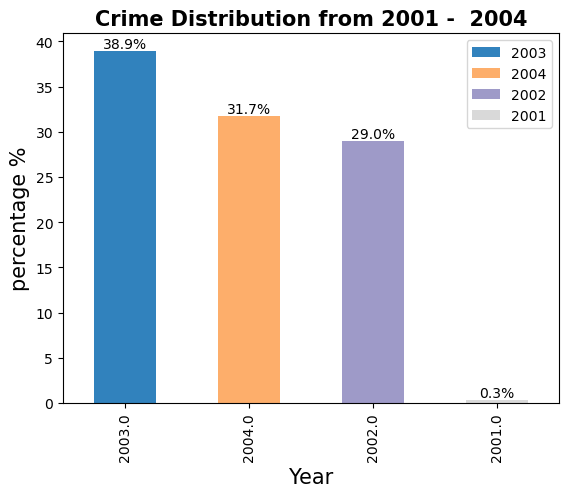

In [65]:
count = df1.Year.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors)
plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("Crime Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);

print("From the graph distribution, the crime rate increases each year")

#### ward distribution where the crimes occurs

In [66]:
df1.Ward.value_counts()

Ward
28.0    52243
2.0     50281
27.0    46156
3.0     46084
24.0    43746
42.0    42945
20.0    41192
17.0    37845
16.0    36733
6.0     36188
21.0    35063
15.0    33546
34.0    32783
37.0    32149
8.0     30806
7.0     30472
9.0     29891
5.0     28454
29.0    27121
1.0     26633
4.0     24503
26.0    24372
32.0    22538
10.0    20446
35.0    18698
18.0    18694
49.0    18277
11.0    17852
30.0    17749
31.0    17702
23.0    17682
46.0    17374
25.0    17242
14.0    15959
13.0    15653
44.0    15455
43.0    15280
12.0    14822
47.0    13562
38.0    13402
22.0    13324
48.0    13176
36.0    12770
40.0    12695
33.0    12361
45.0    12266
50.0    11689
41.0    11459
19.0    11345
39.0    10776
Name: count, dtype: int64

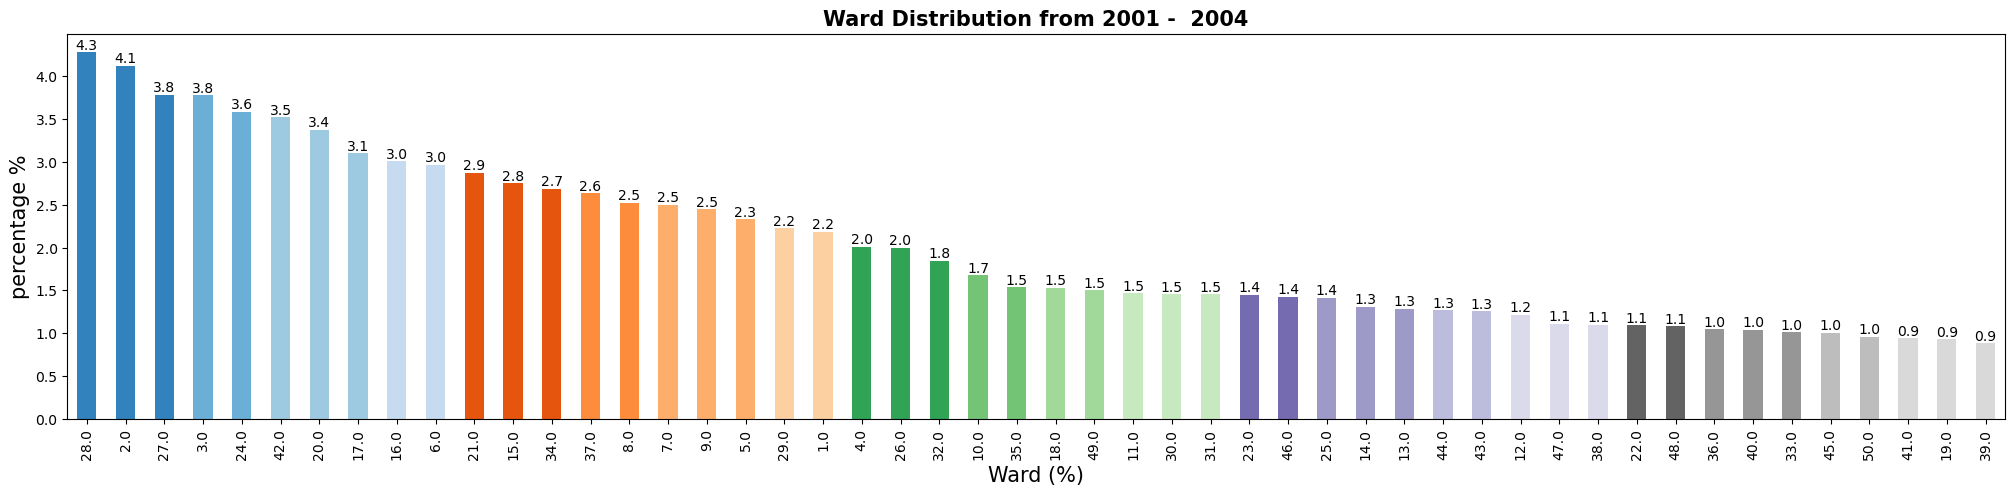

In [67]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.Ward.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.Ward.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 5))
# plt.legend(bars.containers[0],["2003", "2004", "2002", "2001"]) 
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f', label_type='edge')
plt.title("Ward Distribution from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("Ward (%)", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15);



#### Note: District: Indicates the police district where the incident occurred.

#### Analysing the distribution of the police districts where the incident occur

In [68]:
df1.District.value_counts()

District
8.0     81716
11.0    76370
7.0     72588
25.0    71199
2.0     66942
4.0     66553
6.0     65566
12.0    63016
9.0     62297
3.0     60628
19.0    55722
18.0    53179
14.0    52980
15.0    52251
5.0     51967
10.0    50013
1.0     43080
16.0    39682
22.0    39273
24.0    36927
17.0    35484
20.0    22006
31.0        9
21.0        4
Name: count, dtype: int64

From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21


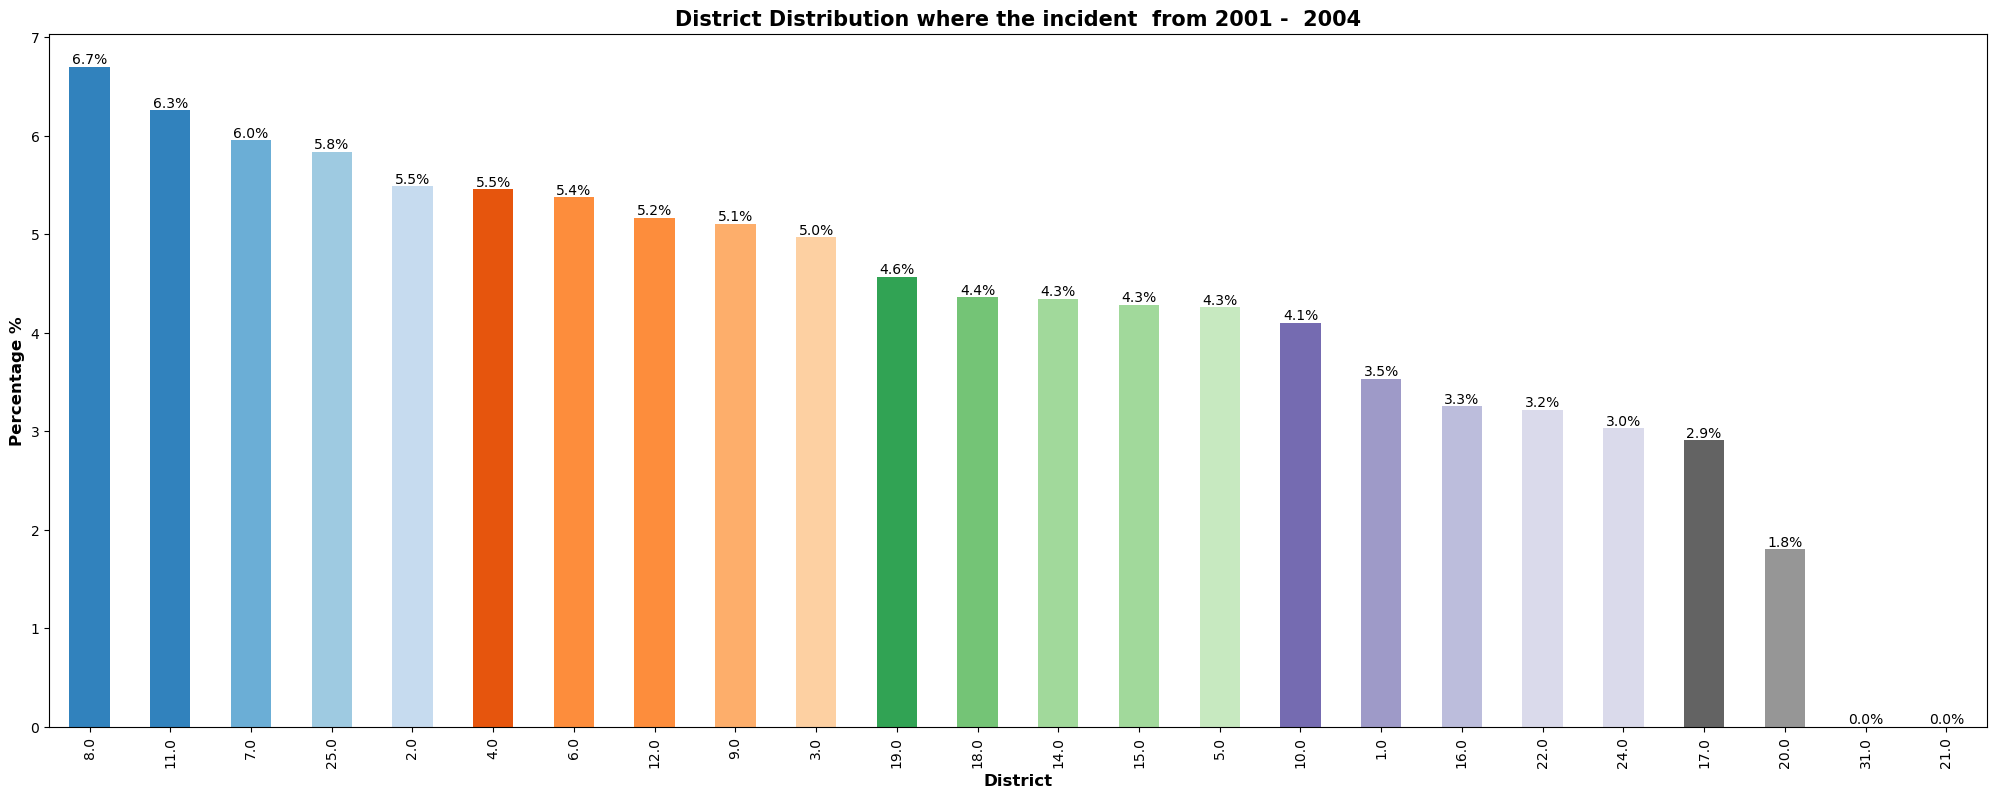

In [69]:
# selecting colors for the graph respectively
cmap = plt.get_cmap('tab20c')
categories = df1.District.unique()
colors = cmap(np.linspace(0, 1, len(categories)))


count = df1.District.value_counts(normalize = True) * 100
bars = count.plot(kind = "bar", color = colors, figsize = (25, 9))

for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')
plt.title("District Distribution where the incident  from 2001 -  2004", fontweight = "bold", fontsize = 15)
plt.xlabel("District", fontsize = 12, fontweight = "bold")
plt.ylabel("Percentage %", fontsize = 12, fontweight = "bold")
print ("From the distribution, most of the incident occurs in district 8 and there seems to be no incident that occur at district 31 and 21")

## Analysising which ward is visited the most by a particular district

 The plot shows the district police that intervane in diffrent incident in the ward


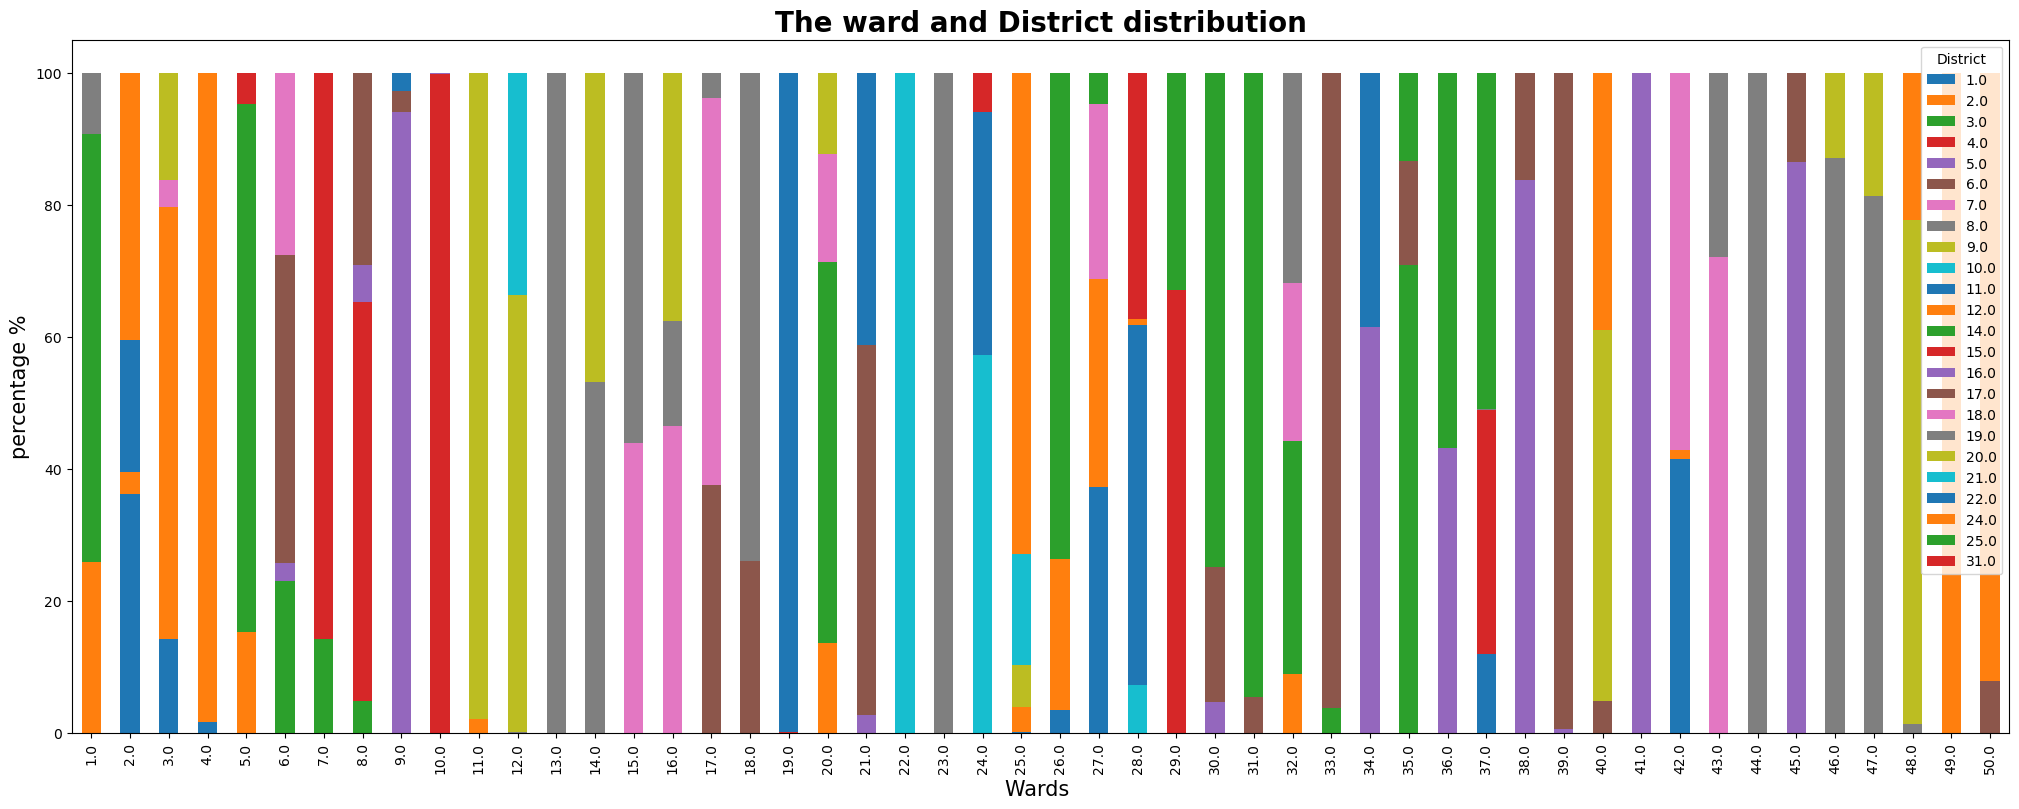

In [98]:
crosstab = pd.crosstab(df["Ward"], df["District"], normalize = "index") * 100 
bars = crosstab.plot(kind = "bar", stacked = True, figsize = (25, 9), )
plt.xlabel("Wards ", fontsize = 15)
plt.ylabel("percentage %", fontsize = 15)
plt.title("The ward and District distribution", fontsize = 20, fontweight = "bold")
print(" The plot shows the district police that intervane in diffrent incident in the ward")
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

##### From the graph above we can observe that there are some wards where only a particular district police intervenes in their situation but there are different police district intervene

In [71]:
df1.columns

Index(['Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'Year'],
      dtype='object')

### analyzing the unique offense type  distribution `primary type`

In [72]:
df1["Primary Type"].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'INTIMIDATION', 'KIDNAPPING', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'RITUALISM', 'NON-CRIMINAL'],
      dtype=object)

In [73]:
print ("The Value Counts of the primary description of the  Crime")
df1["Primary Type"].value_counts()

The Value Counts of the primary description of the  Crime


Primary Type
THEFT                               254005
BATTERY                             229197
CRIMINAL DAMAGE                     139108
NARCOTICS                           133447
OTHER OFFENSE                        77934
ASSAULT                              76222
BURGLARY                             65022
MOTOR VEHICLE THEFT                  61364
ROBBERY                              44539
CRIMINAL TRESPASS                    37514
DECEPTIVE PRACTICE                   35160
PROSTITUTION                         16649
WEAPONS VIOLATION                    10733
OFFENSE INVOLVING CHILDREN            7804
PUBLIC PEACE VIOLATION                6285
SEX OFFENSE                           5395
CRIM SEXUAL ASSAULT                   4451
LIQUOR LAW VIOLATION                  3125
GAMBLING                              2840
ARSON                                 2332
HOMICIDE                              1996
KIDNAPPING                            1682
INTERFERENCE WITH PUBLIC OFFICER      111

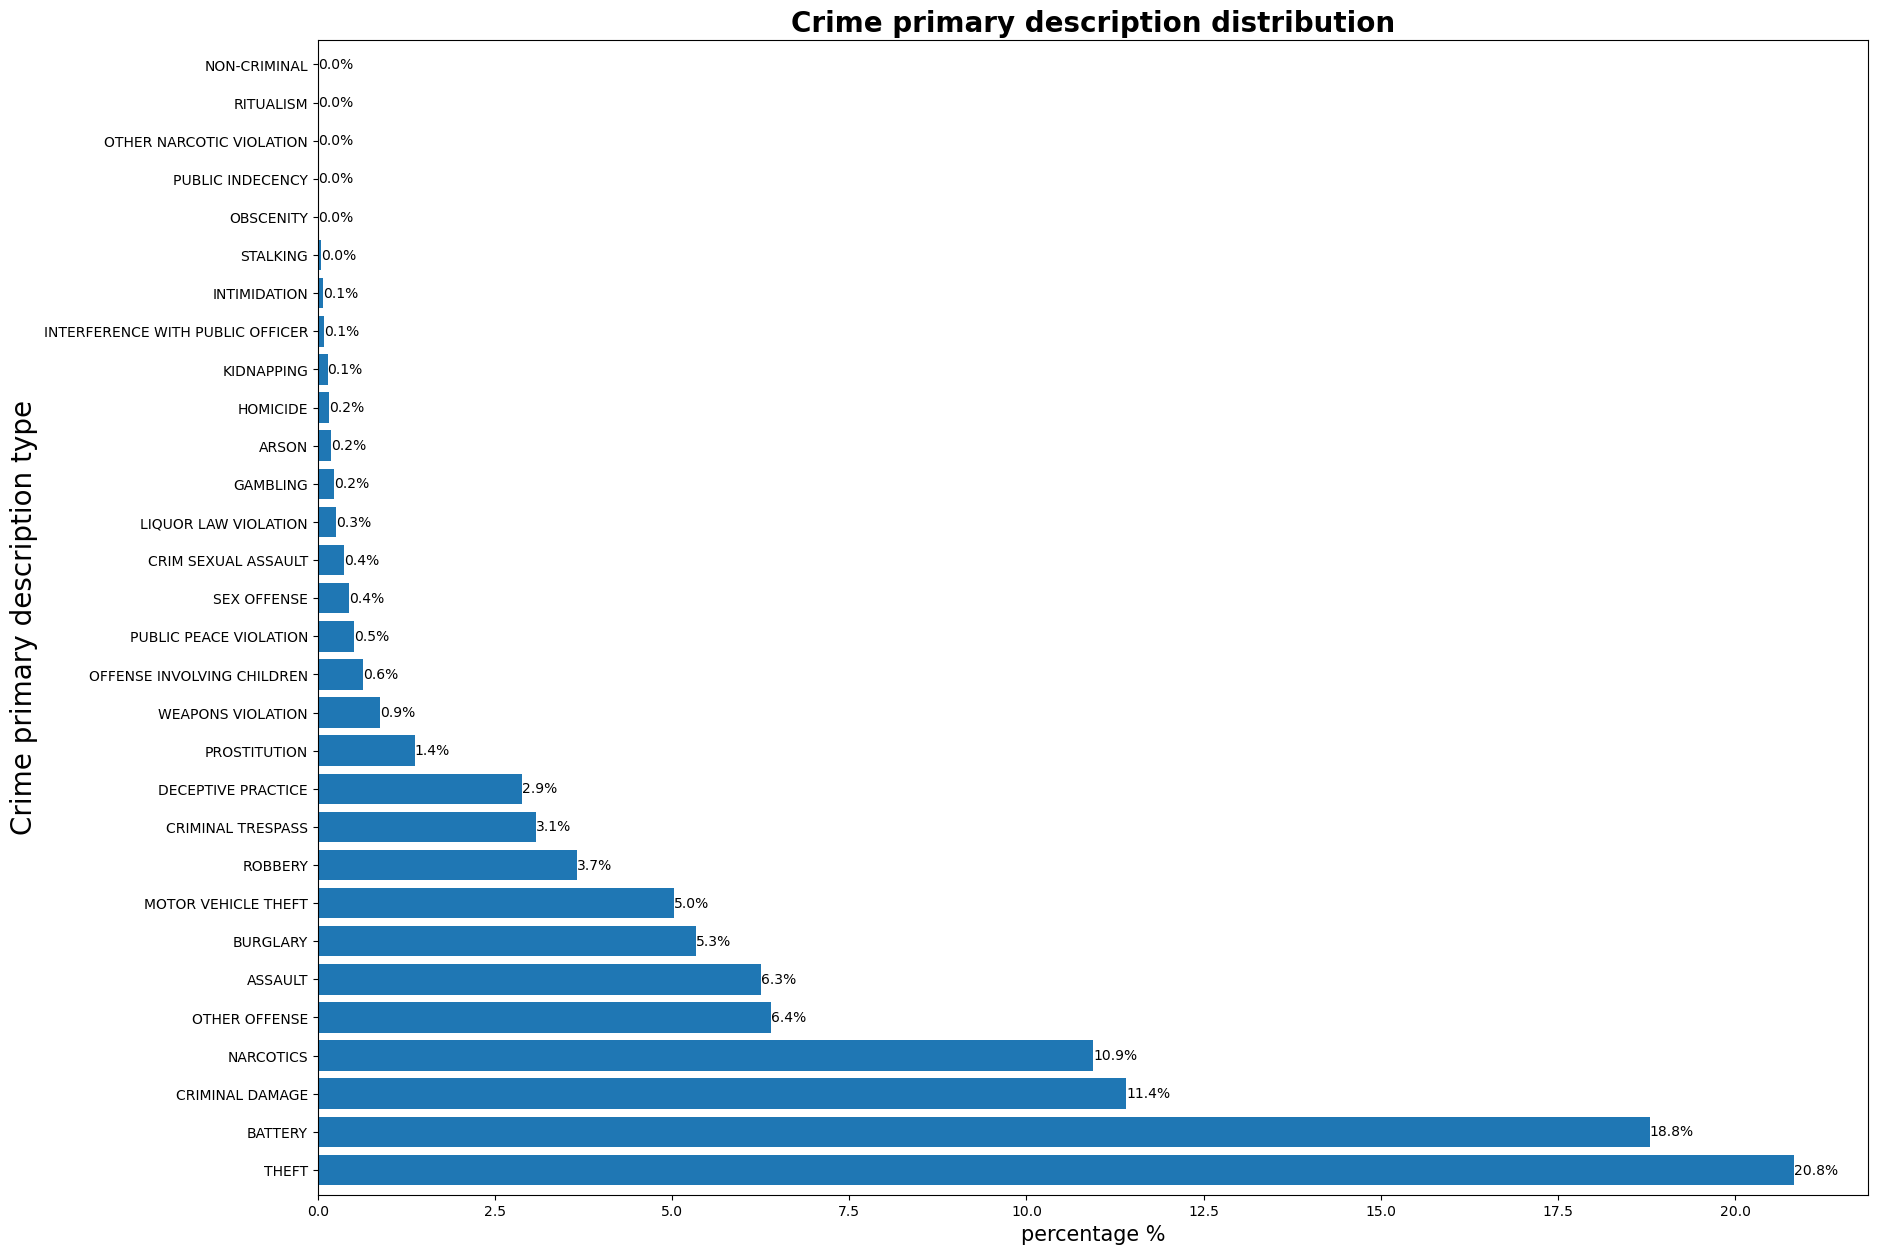

In [74]:
# plotting the primary description of the crime type
count = df1["Primary Type"].value_counts(normalize = True) * 100
bars = count.plot(kind = "barh", figsize = (20, 15), width = 0.8)
plt.xlabel("percentage %", fontsize= 15)
plt.ylabel("Crime primary description type", fontsize= 20)
plt.title("Crime primary description distribution", fontsize= 20, fontweight = "bold")
for container in bars.containers:
    bars.bar_label(container, fmt='%.1f%%', label_type='edge')

##### From the graph above, theft is the most.
* next: Analyzing the ward distribution where the crime type occur

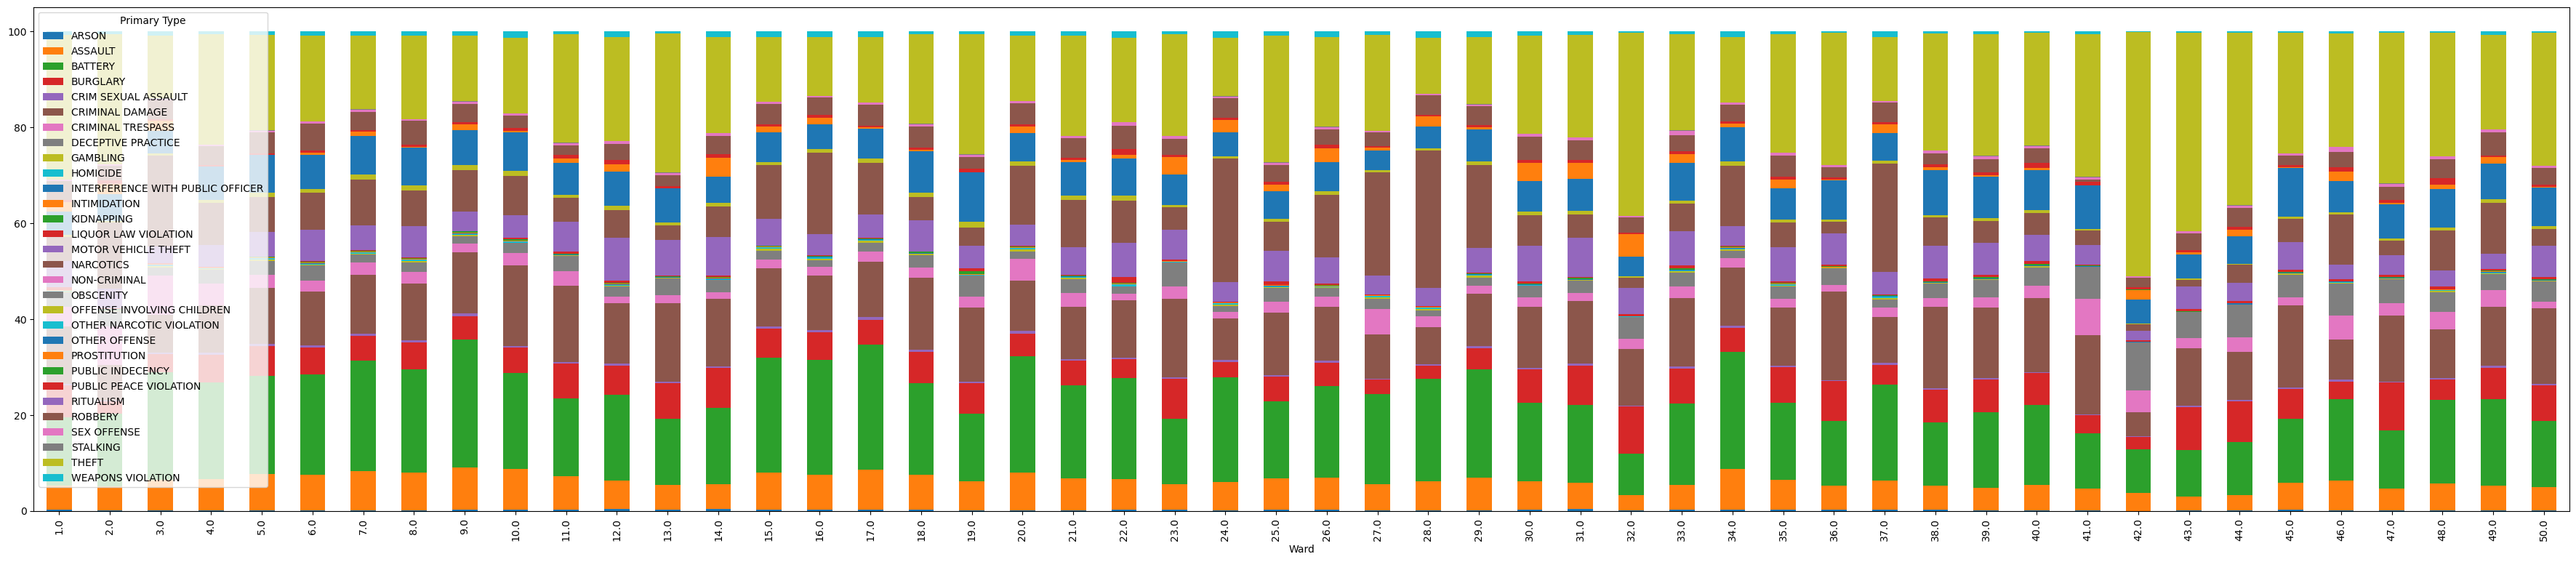

In [99]:
cross = pd.crosstab(df1["Ward"], df1["Primary Type"], normalize = "index") * 100
bars = cross.plot(kind = "bar", figsize = (45,9), stacked = True)
# for container in bars.containers:
#     bars.bar_label(container, fmt='%.1f', label_type='center')

### Analyzing the location description where the incident occur

In [79]:
des_count = df1["Location Description"].value_counts()
des_count 

Location Description
STREET                                         368223
RESIDENCE                                      211190
APARTMENT                                      101606
SIDEWALK                                        99216
OTHER                                           47876
                                                ...  
JUNK YARD/GARBAGE DUMP                              1
COUNTY JAIL                                         1
CTA "L" TRAIN                                       1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA         1
FUNERAL PARLOR                                      1
Name: count, Length: 142, dtype: int64

In [102]:
# Normalizing the Location Description 
des_count1 = df1["Location Description"].value_counts(normalize = True) * 100
des_count1.head(50)

Location Description
STREET                               30.196049
RESIDENCE                            17.318591
APARTMENT                             8.332178
SIDEWALK                              8.136187
OTHER                                 3.926061
PARKING LOT/GARAGE(NON.RESID.)        2.974396
ALLEY                                 2.323360
SCHOOL, PUBLIC, BUILDING              2.311223
RESIDENCE-GARAGE                      2.016006
RESIDENCE PORCH/HALLWAY               1.818866
SMALL RETAIL STORE                    1.591877
GROCERY FOOD STORE                    1.517171
CHA PARKING LOT/GROUNDS               1.434264
RESTAURANT                            1.387849
VEHICLE NON-COMMERCIAL                1.215475
DEPARTMENT STORE                      1.068522
GAS STATION                           1.028668
COMMERCIAL / BUSINESS OFFICE          0.903119
CHA APARTMENT                         0.864658
PARK PROPERTY                         0.774617
CHA HALLWAY/STAIRWELL/ELEVATOR        0

##### From the value count above, removing the outliers (the location description that appears less than 100 times)
##### Note: the filtration can be adjusted

In [108]:
des_count_filtered = des_count1[des_count1 > 1]

# Show the filtered value counts
print(des_count_filtered)

Location Description
STREET                            30.196049
RESIDENCE                         17.318591
APARTMENT                          8.332178
SIDEWALK                           8.136187
OTHER                              3.926061
PARKING LOT/GARAGE(NON.RESID.)     2.974396
ALLEY                              2.323360
SCHOOL, PUBLIC, BUILDING           2.311223
RESIDENCE-GARAGE                   2.016006
RESIDENCE PORCH/HALLWAY            1.818866
SMALL RETAIL STORE                 1.591877
GROCERY FOOD STORE                 1.517171
CHA PARKING LOT/GROUNDS            1.434264
RESTAURANT                         1.387849
VEHICLE NON-COMMERCIAL             1.215475
DEPARTMENT STORE                   1.068522
GAS STATION                        1.028668
Name: proportion, dtype: float64


<Axes: ylabel='Location Description'>

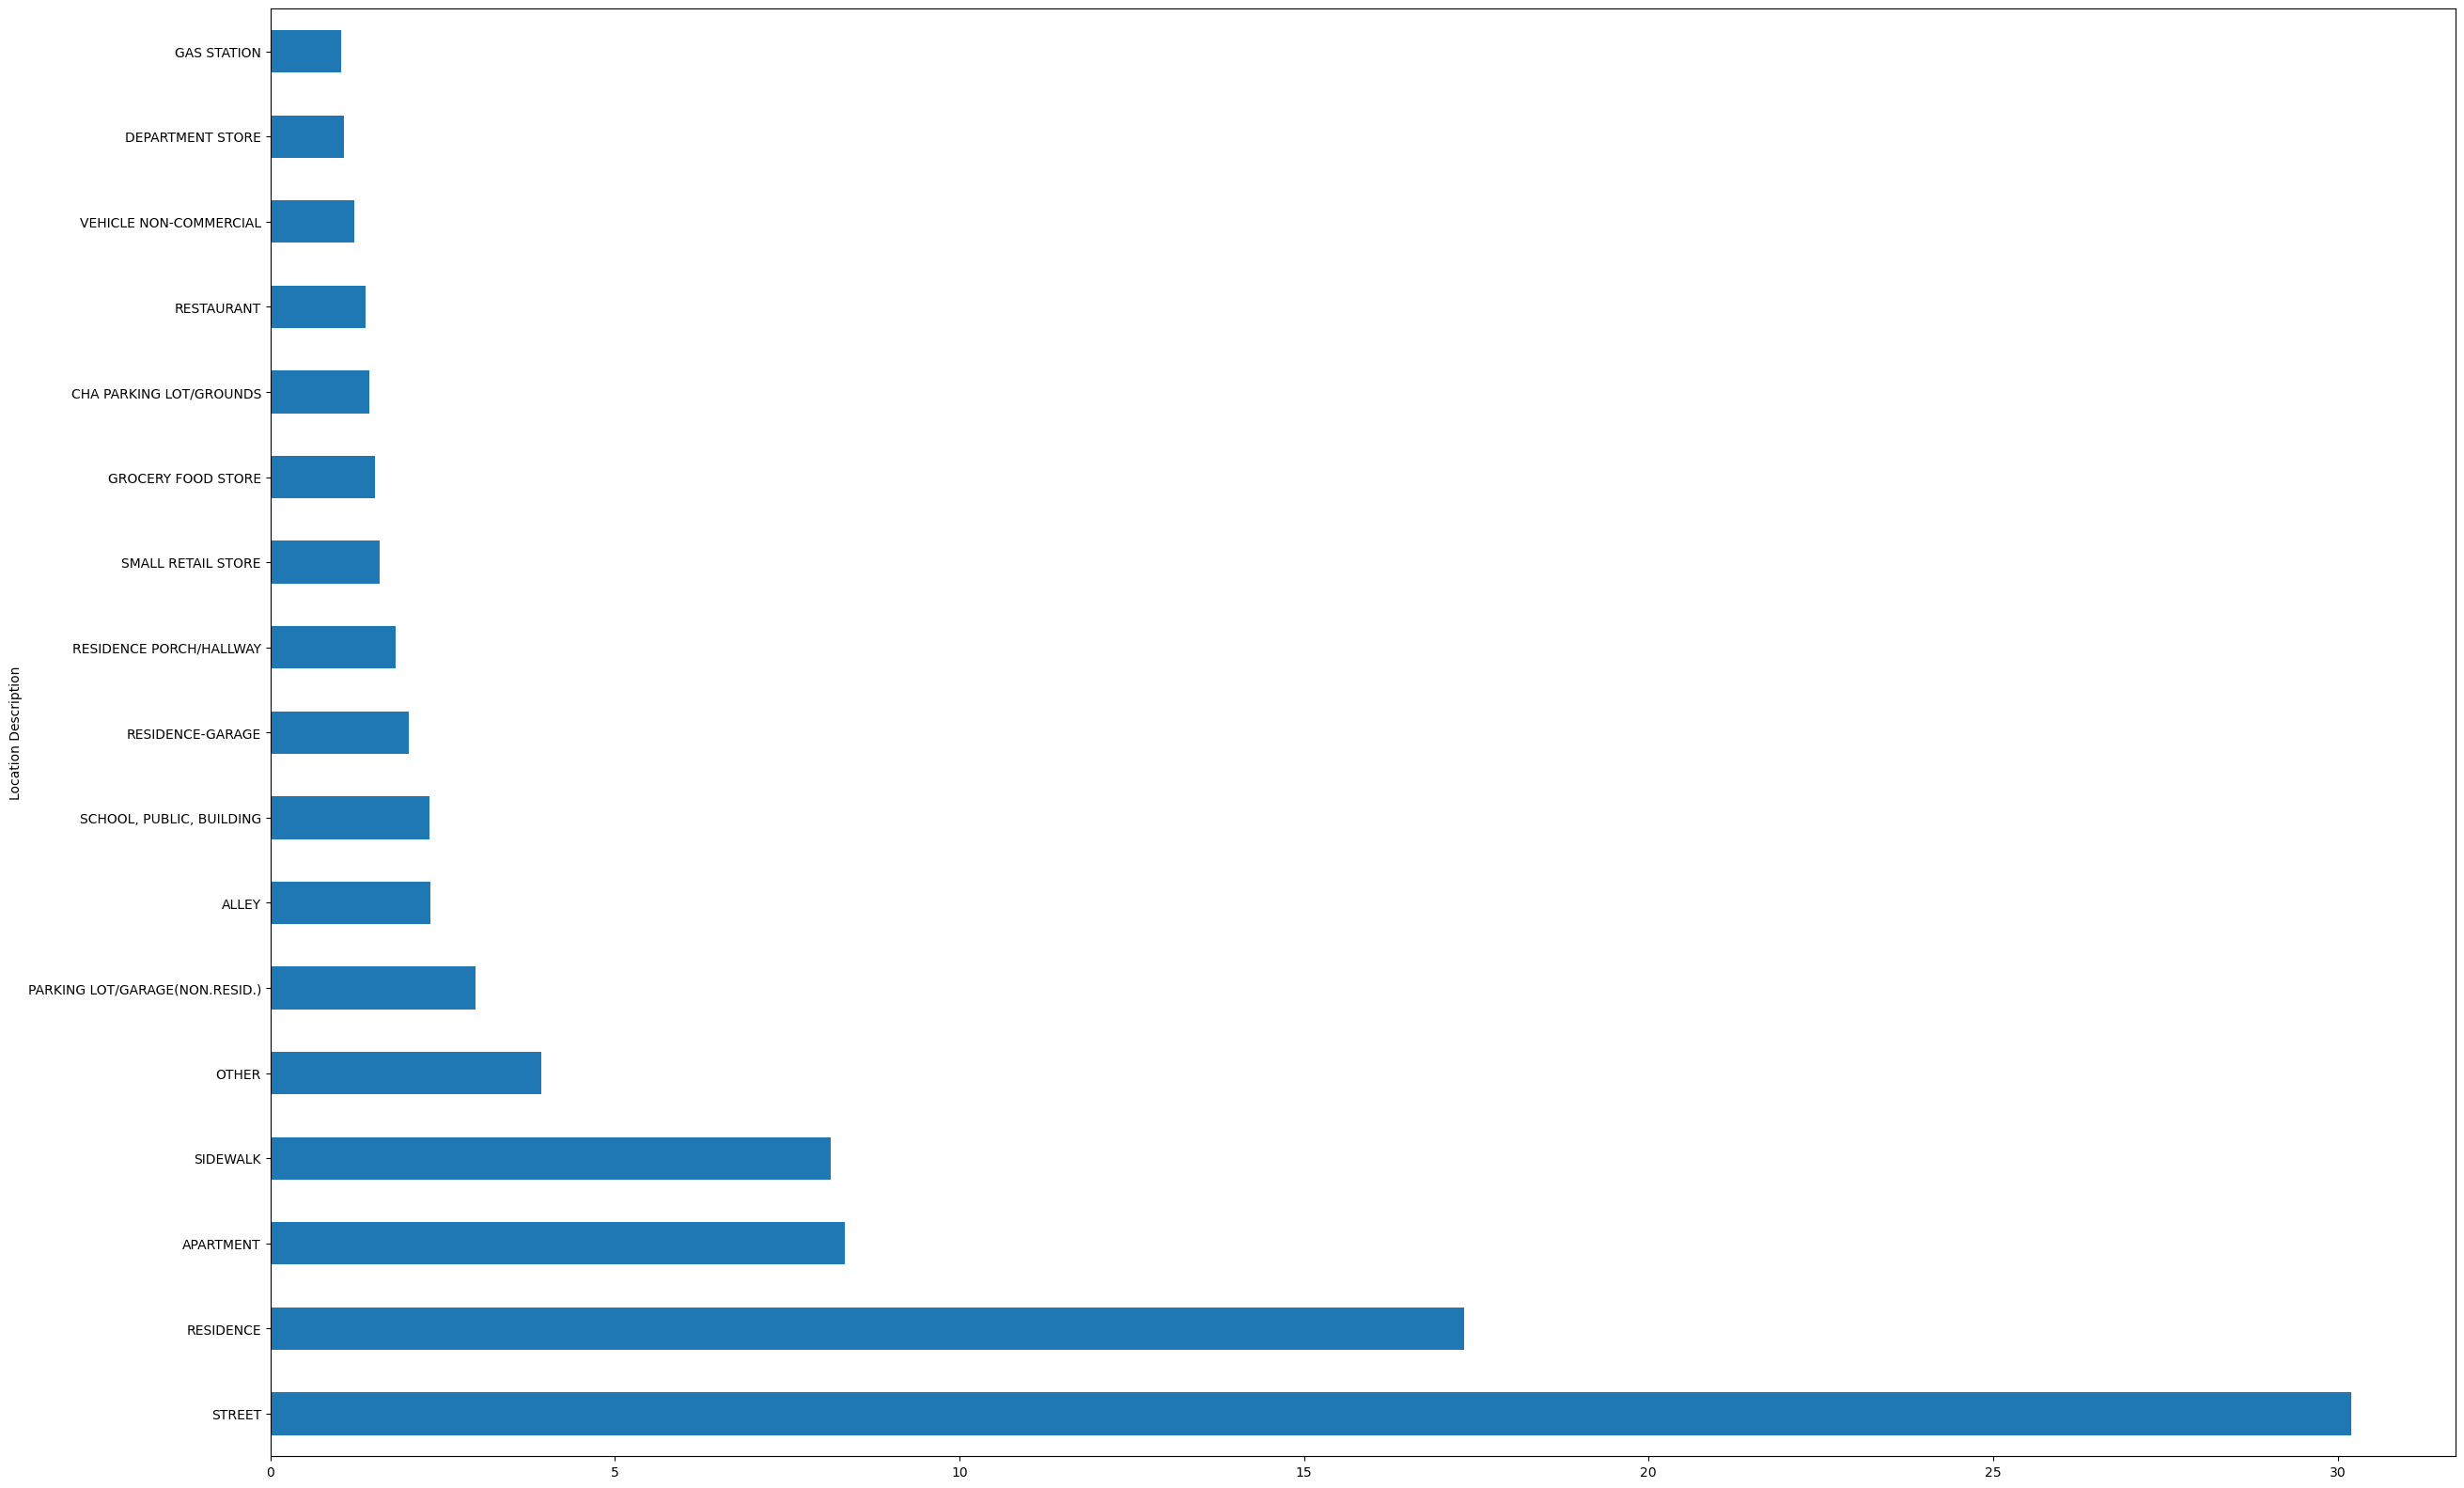

In [111]:
des_count_filtered.plot(kind = "barh", figsize = (30, 20))